# Part 1: Data Exploration and Data Cleaning

## Import Python packages

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## Reading file from local directory

In [3]:
df = pd.read_csv("CC GENERAL.csv")

## Preview data

In [4]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


With a quick overview on the data, we can see that almost all of the datas (except `CUST_ID`) are in integers/floats, which is a good sign since clustering (the task that we will be doing) only accepts numerical values, and it seems that we have already fulfil all of the requirement.
We will be performing a confirmation steps later using `df.info()` to validate our statement.

Also, there seems to be an identifier column named `CUST_ID`. Since we do not need any identifer column during clustering, we can safely drop the column.

In [5]:
df.drop(['CUST_ID'], axis=1, inplace=True)

In [6]:
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


Now we will be performing `df.info()` to validate our previous statement

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   int64  
 11  PURCHASES_TRX                     8950 non-null   int64  
 12  CREDIT

Through this `df.info()`, it seems like all of the columns are in fact in numerical data type. 
It also shows that we have a total of 8950 entries in our data.
However, there seems to be some null entries in our data which can be seen in  the uneven `Non-Null Count` being displayed in the `df.info()`.

let's validate the existence of null entries using `df.isnull().sum()`

In [8]:
df.isnull().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

From here, we can clearly sees that there's 1 null entries in the column `CREDIT_LIMIT` and 313 null entries in the column `MINIMUM_PAYMENTS`.

In [9]:
df['CREDIT_LIMIT'].isnull().sum() / df.shape[0] * 100

0.0111731843575419

In [10]:
df['MINIMUM_PAYMENTS'].isnull().sum() / df.shape[0] * 100

3.4972067039106145

Since these null entries are only occupying 0.01% and 3.5% which are super trivial, we assume that removing those entries will not affect our analysis result. Hence, we can safely drop those null entries

In [11]:
df.dropna(inplace=True)

Now we can verify whether all those null entries have been fully removed by performing `df.isnull().sum()` and `df.info()`

In [12]:
df.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8636 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8636 non-null   float64
 1   BALANCE_FREQUENCY                 8636 non-null   float64
 2   PURCHASES                         8636 non-null   float64
 3   ONEOFF_PURCHASES                  8636 non-null   float64
 4   INSTALLMENTS_PURCHASES            8636 non-null   float64
 5   CASH_ADVANCE                      8636 non-null   float64
 6   PURCHASES_FREQUENCY               8636 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8636 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8636 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8636 non-null   float64
 10  CASH_ADVANCE_TRX                  8636 non-null   int64  
 11  PURCHASES_TRX                     8636 non-null   int64  
 12  CREDIT_LIMI

As we can see, now all columns has the same number of entries, which proves that the null entries have been removed. Now let's look at the characeteristics of each columns using `df.describe()` to perform analysis and detect any anomalies in it

In [14]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000
mean,1601.224893,0.895035,1025.433874,604.901438,420.843533,994.175523,0.496000,0.205909,0.368820,0.137604,3.313918,15.033233,4522.091030,1784.478099,864.304943,0.159304,11.534391
std,2095.571300,0.207697,2167.107984,1684.307803,917.245182,2121.458303,0.401273,0.300054,0.398093,0.201791,6.912506,25.180468,3659.240379,2909.810090,2372.566350,0.296271,1.310984
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.049513,0.019163,0.000000,6.000000
25%,148.095189,0.909091,43.367500,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,418.559237,169.163545,0.000000,12.000000
50%,916.855459,1.000000,375.405000,44.995000,94.785000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,896.675701,312.452292,0.000000,12.000000
75%,2105.195853,1.000000,1145.980000,599.100000,484.147500,1132.385490,0.916667,0.333333,0.750000,0.250000,4.000000,18.000000,6500.000000,1951.142090,825.496463,0.166667,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


Through this table, we can possibly divide the user into two groups, with one being a light spender while the other being a heavy spender.
This can be seen in the `purchases` column where around 75% of the user spend around $1145.98 while the other 25% spend way more than that, reaching a total spend of $49039.57

We can also observe that not many people are putting their cash in advance to their credit card, which can be seen in the `cash_advance` column where 50% of the user have a value of 0. This can be further proven by looking at the `cash_advance_frequency` column which also shows that 50% of the user have a value of 0 which indicates they did not frequently put their cash in advance. The value only goes up from 0 to 0.25 during the 3rd quartile, indicating that most of the people doesn't like to put their cash in advance, which means, most of the people doesn't like to spend their own money.

There seems to be some anomalies in the `cash_advance_frequency` column as the maximum value of the column is 1.5 instead of 1 like any other frequency column. Since the data_dict didnt specify the range of the data, we can't confidentally says whether is it an outlier or a normal data. Hence, we will perform some investigation on it.


In [20]:
df[df['CASH_ADVANCE_FREQUENCY'] > 1]

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
681,5656.069801,1.000000,362.36,362.36,0.0,7240.433194,0.250000,0.250000,0.0,1.250000,12,2,8000.0,683.421497,2036.877611,0.0,8
1626,2876.009336,1.000000,152.61,152.61,0.0,3719.650168,0.333333,0.333333,0.0,1.166667,24,2,4000.0,248.342971,584.926336,0.0,6
2555,5906.184924,1.000000,141.80,141.80,0.0,1651.286918,0.125000,0.125000,0.0,1.125000,12,2,10000.0,933.969974,919.289675,0.0,8
2608,7801.511533,1.000000,231.40,231.40,0.0,4109.465221,0.100000,0.100000,0.0,1.100000,20,3,13500.0,1593.617739,1522.496755,0.0,10
3038,3846.742530,1.000000,0.00,0.00,0.0,1932.460679,0.000000,0.000000,0.0,1.500000,18,0,5600.0,496.245836,538.346874,0.0,6
3253,5709.486507,0.833333,0.00,0.00,0.0,2794.326341,0.000000,0.000000,0.0,1.166667,10,0,6000.0,550.513331,1299.463370,0.0,6
8055,1917.895730,1.000000,285.07,285.07,0.0,6084.858872,0.363636,0.363636,0.0,1.090909,28,6,3000.0,5692.682993,556.449635,0.0,11
8365,3857.562230,1.000000,0.00,0.00,0.0,2127.213754,0.000000,0.000000,0.0,1.142857,26,0,5000.0,617.508991,538.396872,0.0,7


From here, we can analyse that `CASH_ADVANCE_FREQUENCY` with the value of more than 1 only consist of 8 entries of the total data, which is unusual. To prevent faulty data/outliers from affecting our analysis, we will remove those entries with `CASH_ADVANCE_FREQUENCY` having the value more than 1

In [21]:
df = df[df['CASH_ADVANCE_FREQUENCY'] <= 1]

In [24]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8628.000000,8628.000000,8628.00000,8628.000000,8628.000000,8628.000000,8628.000000,8628.000000,8628.000000,8628.000000,8628.000000,8628.000000,8628.000000,8628.000000,8628.000000,8628.000000,8628.000000
mean,1598.354973,0.894957,1026.24869,605.326331,421.233745,991.659727,0.496324,0.205964,0.369162,0.136626,3.299606,15.045433,4519.897790,1784.879064,864.179560,0.159451,11.537900
std,2093.714840,0.207771,2167.94357,1685.026007,917.580801,2120.038558,0.401294,0.300156,0.398119,0.199273,6.896883,25.188885,3658.895219,2910.678080,2373.607902,0.296369,1.305382
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.049513,0.019163,0.000000,6.000000
25%,147.717342,0.909091,43.76500,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,418.308240,169.062177,0.000000,12.000000
50%,916.344236,1.000000,376.12000,44.945000,95.420000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,897.282710,311.800297,0.000000,12.000000
75%,2096.706479,1.000000,1146.57500,600.000000,484.852500,1128.981652,0.916667,0.333333,0.750000,0.250000,4.000000,18.000000,6500.000000,1951.294063,824.245902,0.166667,12.000000
max,19043.138560,1.000000,49039.57000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.000000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8628 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8628 non-null   float64
 1   BALANCE_FREQUENCY                 8628 non-null   float64
 2   PURCHASES                         8628 non-null   float64
 3   ONEOFF_PURCHASES                  8628 non-null   float64
 4   INSTALLMENTS_PURCHASES            8628 non-null   float64
 5   CASH_ADVANCE                      8628 non-null   float64
 6   PURCHASES_FREQUENCY               8628 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8628 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8628 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8628 non-null   float64
 10  CASH_ADVANCE_TRX                  8628 non-null   int64  
 11  PURCHASES_TRX                     8628 non-null   int64  
 12  CREDIT_LIMI

Now that we have perform all the necessary data cleaning, we can start performing clustering to our data

# Part 2: Clustering

Before clustering, we will perform min max scaling to scale our data into a uniform scale which is 0-1 for accurate clustering

In [26]:
from sklearn.preprocessing import MinMaxScaler

In [27]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df)
scaled_data

array([[2.14779454e-03, 8.18182000e-01, 1.94536779e-03, ...,
        1.82564563e-03, 0.00000000e+00, 1.00000000e+00],
       [1.68169097e-01, 9.09091000e-01, 0.00000000e+00, ...,
        1.40344791e-02, 2.22222000e-01, 1.00000000e+00],
       [1.31026136e-01, 1.00000000e+00, 1.57662475e-02, ...,
        8.20961806e-03, 0.00000000e+00, 1.00000000e+00],
       ...,
       [1.22871936e-03, 8.33333000e-01, 2.94456089e-03, ...,
        1.07843629e-03, 2.50000000e-01, 0.00000000e+00],
       [7.06688341e-04, 8.33333000e-01, 0.00000000e+00, ...,
        7.29475795e-04, 2.50000000e-01, 0.00000000e+00],
       [1.95717777e-02, 6.66667000e-01, 2.22932216e-02, ...,
        1.15527021e-03, 0.00000000e+00, 0.00000000e+00]])

In [28]:
df_scaled = pd.DataFrame(scaled_data, columns = df.columns)
df_scaled.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,0.002148,0.818182,0.001945,0.000000,0.004240,0.000000,0.166667,0.000000,0.083333,0.00,0.00000,0.005587,0.031720,0.003978,0.001826,0.000000,1.0
1,0.168169,0.909091,0.000000,0.000000,0.000000,0.136685,0.000000,0.000000,0.000000,0.25,0.03252,0.000000,0.232053,0.080892,0.014034,0.222222,1.0
2,0.131026,1.000000,0.015766,0.018968,0.000000,0.000000,1.000000,1.000000,0.000000,0.00,0.00000,0.033520,0.248748,0.012263,0.008210,0.000000,1.0
3,0.042940,1.000000,0.000326,0.000393,0.000000,0.000000,0.083333,0.083333,0.000000,0.00,0.00000,0.002793,0.038397,0.013373,0.003204,0.000000,1.0
4,0.095038,1.000000,0.027188,0.000000,0.059257,0.000000,0.666667,0.000000,0.583333,0.00,0.00000,0.022346,0.058431,0.027602,0.031506,0.000000,1.0


In [30]:
df_scaled.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8628.000000,8628.000000,8628.000000,8628.000000,8628.000000,8628.000000,8628.000000,8628.000000,8628.000000,8628.000000,8628.000000,8628.000000,8628.000000,8628.000000,8628.000000,8628.000000,8628.000000
mean,0.083933,0.894957,0.020927,0.014851,0.018721,0.021038,0.496324,0.205964,0.369162,0.136626,0.026826,0.042026,0.149245,0.035189,0.011310,0.159451,0.922983
std,0.109946,0.207771,0.044208,0.041339,0.040781,0.044976,0.401294,0.300156,0.398119,0.199273,0.056072,0.070360,0.122167,0.057386,0.031066,0.296369,0.217564
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.007757,0.909091,0.000892,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,0.002793,0.051753,0.008246,0.002212,0.000000,1.000000
50%,0.048119,1.000000,0.007670,0.001103,0.004241,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,0.019553,0.098497,0.017689,0.004081,0.000000,1.000000
75%,0.110103,1.000000,0.023381,0.014720,0.021549,0.023951,0.916667,0.333333,0.750000,0.250000,0.032520,0.050279,0.215359,0.038470,0.010787,0.166667,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Through `df_scaled.describe()` we verified that we have successfully scaled our data to 0-1 by observing the min and max of each columns. Now, we can start performing clustering to our data.

The clustering algorithm that we will be using in this part will be `K-Means Clustering` and `DB-SCAN`, The reason why we will not be performing hierarchical clustering is due to it not scalable for large dataset. Since we have `8000+` entries in this dataset, the time computation will probably be slow and memory usage will probably be high. Due to this reason, we will not be performing hierarchical clustering.

## K-Means Clustering

To determine the number of clusters that we need to use in K-Means clustering, we will be performing elbow method to locate the optimal k

In [31]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [33]:
X = df_scaled.to_numpy()

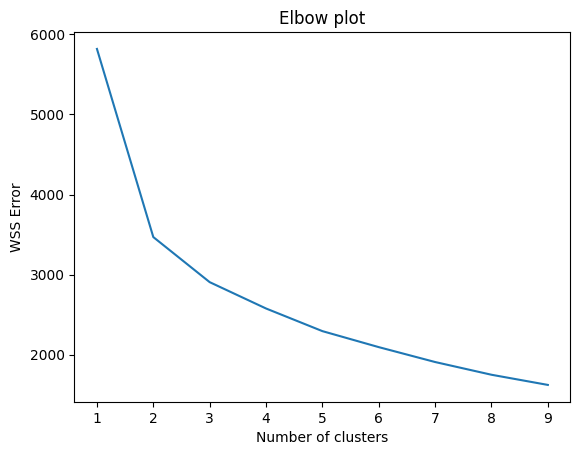

In [34]:
ssw = []
clusters = range(1, 10)
for i in clusters:
    model = KMeans(n_clusters = i, init='k-means++', n_init=100)
    model.fit(X)
    ssw.append(model.inertia_)

plt.xlabel("Number of clusters")
plt.ylabel("WSS Error")
plt.title("Elbow plot")
plt.plot(clusters, ssw)

Through the elbow plot, the elbow point seems to be around 2 or 3, where there's a sharp drop in WSS Error from 1 to 2 and a minor but visible drop from 2 to 3. From 3 onwards, the WSS errors just decline slowly smoothly without any visible drop. In this case, we will be taking 3 as our optimal cluster since that's a last point with a visible drop

In [35]:
km_model = KMeans(n_clusters = 3)
predicted_cluster = km_model.fit_predict(X)
df_scaled['KMeans_Cluster'] = predicted_cluster

In [36]:
df_scaled

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,KMeans_Cluster
0,0.002148,0.818182,0.001945,0.000000,0.004240,0.000000,0.166667,0.000000,0.083333,0.000000,0.00000,0.005587,0.031720,0.003978,0.001826,0.000000,1.0,0
1,0.168169,0.909091,0.000000,0.000000,0.000000,0.136685,0.000000,0.000000,0.000000,0.250000,0.03252,0.000000,0.232053,0.080892,0.014034,0.222222,1.0,0
2,0.131026,1.000000,0.015766,0.018968,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.033520,0.248748,0.012263,0.008210,0.000000,1.0,2
3,0.042940,1.000000,0.000326,0.000393,0.000000,0.000000,0.083333,0.083333,0.000000,0.000000,0.00000,0.002793,0.038397,0.013373,0.003204,0.000000,1.0,0
4,0.095038,1.000000,0.027188,0.000000,0.059257,0.000000,0.666667,0.000000,0.583333,0.000000,0.00000,0.022346,0.058431,0.027602,0.031506,0.000000,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8623,0.000308,0.500000,0.000426,0.000513,0.000000,0.000000,0.166667,0.166667,0.000000,0.000000,0.00000,0.002793,0.015025,0.001155,0.000569,0.000000,0.0,0
8624,0.001496,1.000000,0.005936,0.000000,0.012939,0.000000,1.000000,0.000000,0.833333,0.000000,0.00000,0.016760,0.031720,0.006418,0.000640,0.500000,0.0,1
8625,0.001229,0.833333,0.002945,0.000000,0.006418,0.000000,0.833333,0.000000,0.666667,0.000000,0.00000,0.013966,0.031720,0.001601,0.001078,0.250000,0.0,1
8626,0.000707,0.833333,0.000000,0.000000,0.000000,0.000776,0.000000,0.000000,0.000000,0.166667,0.01626,0.000000,0.015025,0.001035,0.000729,0.250000,0.0,0


## DB-SCAN

We will be using `Percentage of Points Classified as Outliers VS Epsilon Value` plot to obtain the optimal value for epsilon. We will make an assumption that there will be at most 1% of the data being an outlier

In [37]:
from sklearn.cluster import DBSCAN

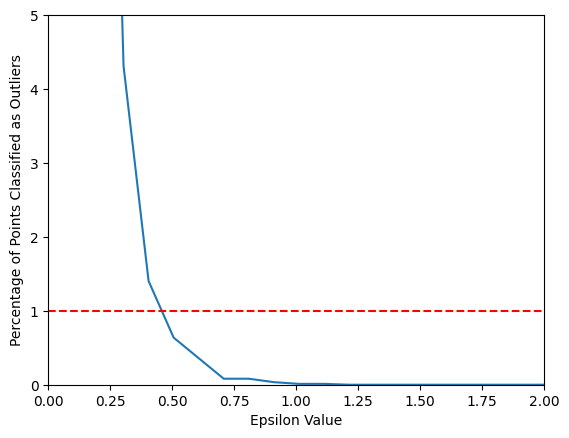

In [38]:
outlier_percent = []
number_of_outliers = []

for eps in np.linspace(0.001,10,100):

    # Create Model
    db_model = DBSCAN(eps=eps)
    db_model.fit(X)

    # Log Number of Outliers
    number_of_outliers.append(np.sum(db_model.labels_ == -1))

    # Log percentage of points that are outliers
    perc_outliers = 100 * np.sum(db_model.labels_ == -1) / len(db_model.labels_)

    outlier_percent.append(perc_outliers)


sns.lineplot(x=np.linspace(0.001,10,100),y=outlier_percent)
plt.ylabel("Percentage of Points Classified as Outliers")
plt.xlabel("Epsilon Value")
plt.ylim(0,5)
plt.xlim(0,2)
plt.hlines(y=1,xmin=0,xmax=2,colors='red',ls='--')

Since our assumption is that there will be at most 1% of outliers in our data, according to our graph, the optimal epsilon value will be around 0.45.
To select the optimal value for min_samples, a rule of thumb of it is we will be using the value `2 * num_dim`

In [46]:
db_model = DBSCAN(eps=0.45, min_samples=2 * X.shape[1])
db_model.fit(X)
clusters = db_model.fit_predict(X)
df_scaled['DBSCAN_Cluster'] = clusters

In [48]:
df_scaled['DBSCAN_Cluster'].unique()

array([ 0, -1], dtype=int64)

From here, we can see that DB-SCAN only found 1 cluster in this dataset (-1 is outliers), unlike K-Means Clustering which found 3 clusters in the dataset.

# Part 3: Cluster Behaviour Analysis 

We will be using K-Means clustering results for our Cluster Behaviour Analysis.

Let's start by looking the relationship between `Purchases` and `

In [ ]:
sns.scatterplot(x= "Grocery", y="Milk", hue="Cluster", palette="Accent", data=df)
plt.show()